# NumPy, SciPy and dynamic relaxation
## Introduction
In today's session we will focus on more advanced uses of scientific and computing libraries in Python. The main exercise will allow you to deform a mesh into a relaxed position, given an inverted gravitational force. 

## Aknowledgements
*Dynamic relaxation* exercise was originally written by Shervin Azadi and Pirouz Nourian, 
*NumPy/SciPy introduction* by Kotryna Valeckaite. Last edit on 09/2020

Thanks to Ir. Dirk Rinze Visser for introducing the following reference:
* Adriaenssens, S., P. Block, D. Veenendaal, and C. Williams (2014). Shell Structures for Architecture: Form Finding and Optimization. New York: Routledge. 
* Chapter 2: Review of Dynamic Relaxation with an extension to six degrees of freedom theory by Adriaenssens, S.


# NumPy
[Numpy](https://numpy.org/doc/1.17/reference/index.html) ([the user guide](https://numpy.org/doc/1.17/user/index.html#user)) is the core library for scientific computing in Python. It provides very fast code for linear algebra operations, effectively replacing Matlab. Numpy is a **core Python library** upon which many others are built on (e.g. Pandas for data engineering, SciKit-learn for machine learning, SciPy for advance linear algebra). So knowing the basics of Numpy will help you to faster understand the higher-level libraries and adopt solutions (look up Stack Overflow: as long as you know how to Google the solution will be there...)

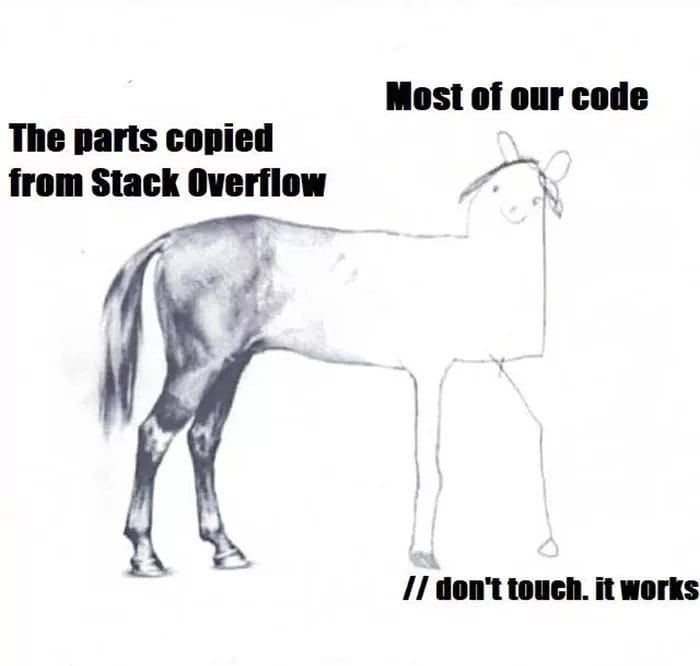

## How does Numpy work?
The base component in Numpy is an array. In short it works like an algebraic matrix: it can have one or more dimensions. 

A numpy array is a grid of values, **all of the same type**. It smartly stores data in one place in the computer memory, unlike other Python array-like objects. Those are scattered in memory and the code just has links to those locations. It's easy to use, but performance suffers a lot.


### SciPy : TODO
SciPy is an open-source Python library used for scientific and technical computing. It has several sub-packages, such as on covering constants, spatial algorithms (e.g. distance, nearest neighbor fuctions), linear algebra methods and many more. It is built on top of NumPy, making it not only a useful, but also a powerful tool. More about it [here](https://www.tutorialspoint.com/scipy/index.htm).

This library will not be used in the following exercise, but it will prove very useful if you need to do more complex linear algebra routines, such as integration.

### Let's create a NumPy array

In [ ]:
import numpy as np

# Create a rank 1 array (1D matrix)
a = np.array([1, 2, 3])   

print(a)        
print(type(a))            
print(a.shape)            
print(a[0], a[1], a[2]) 
a[0] = 5
print(a) 

Arrays can be made in many other ways and remembering this functionality (or printing out a cheat sheet) will save you precious coding time. Also, you are not limited to 2 dimensions: all examples below can be extended by 1 dimension by adding an additional value after the comma.

In [1]:
# Creates an array of all zeros
       
                      
# Creates an array of all ones
             

# Creates an array of all of a specific number (5 in this case)
      
# Creates an identity matrix of a specified size (3 in this case)
            
                      
# Creates a 2x3 array filled with random values in [0,5)


### Exercise 1
Create an identity matrix of size 3, then change all the ones to a different value each.

In [ ]:
array = np.???

### Performance example
To compare the performance of pure Python and Numpy, follow the pseudocode instructions in the next cells.

In [187]:
my_list = []
# Populate my_list, such that it contains 10**6 lists of [2,2,2]
???

In [188]:
def python_test(my_list):
    # TODO: multiply each number in my_list by 3

# this is called a magic command, check out: 
# https://ipython.readthedocs.io/en/stable/interactive/magics.html
%time python_test(my_list)        

Wall time: 1.49 s


In [189]:
# TODO: create an array of 3x10**6 containing only 2s
array = ???

In [190]:
def numpy_test(array):
    # TODO: multiply each number in the array by 3
   
    
%time numpy_test(array) 

Wall time: 12 ms


# Dynamic relaxation
This exercise consists of 3 main steps:
1. Reading in the data and defining the initial state of the mesh
2. Relaxing the mesh
3. Plotting the results


In [3]:
# For step 2
from numpy import array, zeros, float64, append, sqrt, sign

# For step 3
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# necessary only for the Jupyter notebook
%matplotlib notebook 

## 1. Reading in the data and defining the initial state of the mesh
During this step we need to read in the data, parse it to something we can manipulate, pre-process the geometeries and pass the results/ initial state of the mesh to the next process. The expected outputs of this step are:
* points : List of points
* edges : List of edges
* vertices : List of vertices
* xyzIS : Initial state of the system
* bbmax, bbmin : Bounding box of the mesh

-------

The only input for the first step of the exercise in the location of the mesh file (.obj) you received together with this notebook.

To begin with, let's locate the file and open it:

In [4]:
filename = 'BasicRhinoOutput.obj' # TODO: fill in the name of the file and potentially the location
#filename=filename.replace('\','//')
# opening the file

def open_obj_file(filename):
    with open(filename, 'r') as myfile:
        return myfile.read().split('\n')

### What is inside of data? (for a more elaborate description of the format, check out this [link](http://paulbourke.net/dataformats/obj/))

In [5]:
data = open_obj_file(filename)
data

['# Rhino',
 '',
 'v 0 0 0',
 'v 0 1 0',
 'v 0 2 0',
 'v 0 3 0',
 'v 0 4 0',
 'v 0 5 0',
 'v 0 6 0',
 'v 0 7 0',
 'v 0 8 0',
 'v 0 9 0',
 'v 0 10 0',
 'v 1 0 0',
 'v 1 1 0',
 'v 1 2 0',
 'v 1 3 0',
 'v 1 4 0',
 'v 1 5 0',
 'v 1 6 0',
 'v 1 7 0',
 'v 1 8 0',
 'v 1 9 0',
 'v 1 10 0',
 'v 2 0 0',
 'v 2 1 0',
 'v 2 2 0',
 'v 2 3 0',
 'v 2 4 0',
 'v 2 5 0',
 'v 2 6 0',
 'v 2 7 0',
 'v 2 8 0',
 'v 2 9 0',
 'v 2 10 0',
 'v 3 0 0',
 'v 3 1 0',
 'v 3 2 0',
 'v 3 3 0',
 'v 3 4 0',
 'v 3 5 0',
 'v 3 6 0',
 'v 3 7 0',
 'v 3 8 0',
 'v 3 9 0',
 'v 3 10 0',
 'v 4 0 0',
 'v 4 1 0',
 'v 4 2 0',
 'v 4 3 0',
 'v 4 4 0',
 'v 4 5 0',
 'v 4 6 0',
 'v 4 7 0',
 'v 4 8 0',
 'v 4 9 0',
 'v 4 10 0',
 'v 5 0 0',
 'v 5 1 0',
 'v 5 2 0',
 'v 5 3 0',
 'v 5 4 0',
 'v 5 5 0',
 'v 5 6 0',
 'v 5 7 0',
 'v 5 8 0',
 'v 5 9 0',
 'v 5 10 0',
 'v 6 0 0',
 'v 6 1 0',
 'v 6 2 0',
 'v 6 3 0',
 'v 6 4 0',
 'v 6 5 0',
 'v 6 6 0',
 'v 6 7 0',
 'v 6 8 0',
 'v 6 9 0',
 'v 6 10 0',
 'v 7 0 0',
 'v 7 1 0',
 'v 7 2 0',
 'v 7 3 0',
 'v 

### How do we make this readable?

In [6]:
def process_obj_file(data):
    # initiating the output
    xyz = []  # xyz coordinates
    points = []  # references to vertices
    lines = []  # pairs of references to vertices
    
    # parsing the obj file, filling the data lists
    for line in data:
        # split the string line by ' '
        parts = line.split(' ')

        # TODO: this seems unnecessary
        # checking if it contains data 
        if not parts:
            continue

        # assigning the 1st element to head and the rest to tail 
        head = parts[0]
        tail = parts[1:]

        # appending vertex cordinations in (xyz) and assigning an index to them in (points)
        if head == 'v':
            ftail = [float(x) for x in tail]
            xyz.append(ftail)
            points.append(len(xyz)-1)
        # iterating through the edges of the faces and appending them in (lines)
        elif head == 'f':
            ftail = [float(x) for x in tail]
            for i in range(len(ftail)):
                sp = ftail[i%len(ftail)]
                ep = ftail[(i+1)%len(ftail)]
                lines.append((int(sp)-1, int(ep)-1))
    return xyz, points, lines

In [11]:
xyz, points, lines = process_obj_file(data)
xyz

[[0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 2.0, 0.0],
 [0.0, 3.0, 0.0],
 [0.0, 4.0, 0.0],
 [0.0, 5.0, 0.0],
 [0.0, 6.0, 0.0],
 [0.0, 7.0, 0.0],
 [0.0, 8.0, 0.0],
 [0.0, 9.0, 0.0],
 [0.0, 10.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 2.0, 0.0],
 [1.0, 3.0, 0.0],
 [1.0, 4.0, 0.0],
 [1.0, 5.0, 0.0],
 [1.0, 6.0, 0.0],
 [1.0, 7.0, 0.0],
 [1.0, 8.0, 0.0],
 [1.0, 9.0, 0.0],
 [1.0, 10.0, 0.0],
 [2.0, 0.0, 0.0],
 [2.0, 1.0, 0.0],
 [2.0, 2.0, 0.0],
 [2.0, 3.0, 0.0],
 [2.0, 4.0, 0.0],
 [2.0, 5.0, 0.0],
 [2.0, 6.0, 0.0],
 [2.0, 7.0, 0.0],
 [2.0, 8.0, 0.0],
 [2.0, 9.0, 0.0],
 [2.0, 10.0, 0.0],
 [3.0, 0.0, 0.0],
 [3.0, 1.0, 0.0],
 [3.0, 2.0, 0.0],
 [3.0, 3.0, 0.0],
 [3.0, 4.0, 0.0],
 [3.0, 5.0, 0.0],
 [3.0, 6.0, 0.0],
 [3.0, 7.0, 0.0],
 [3.0, 8.0, 0.0],
 [3.0, 9.0, 0.0],
 [3.0, 10.0, 0.0],
 [4.0, 0.0, 0.0],
 [4.0, 1.0, 0.0],
 [4.0, 2.0, 0.0],
 [4.0, 3.0, 0.0],
 [4.0, 4.0, 0.0],
 [4.0, 5.0, 0.0],
 [4.0, 6.0, 0.0],
 [4.0, 7.0, 0.0],
 [4.0, 8.0, 0.0],
 [4.0, 9.0, 0.0],
 [4.0, 10.0, 0.0],
 [5.0

### How do we preprocess the data?

In [12]:
def mesh_welding(xyz):
    
    # This is how we store the welded points
    vertices = []
    
    # initiating the bounding box max and min point
    bbmax = [0,0,0]
    bbmin = [0,0,0]

    # points to vertices (welding similar vertices)
    x2v = {}
    tol = 0.001 ** 2

    for i, x in enumerate(xyz):
        found = False
        for j, v in enumerate(vertices):
            if (x[0] - v[0]) ** 2 < tol \
                    and (x[1] - v[1]) ** 2 < tol \
                    and (x[2] - v[2]) ** 2 < tol:
                found = True
                x2v[i] = j
                break
        if not found:
            x2v[i] = len(vertices)
            vertices.append(x)

        #finding the bounding box
        for i in range(3):
            if x[i] > bbmax[i]: 
                bbmax[i] = x[i]
            if x[i] < bbmin[i]: 
                bbmin[i] = x[i]
    return bbmin, bbmax, vertices, x2v

In [13]:
bbmin, bbmax, vertices, x2v = mesh_welding(xyz)
vertices

[[0.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 2.0, 0.0],
 [0.0, 3.0, 0.0],
 [0.0, 4.0, 0.0],
 [0.0, 5.0, 0.0],
 [0.0, 6.0, 0.0],
 [0.0, 7.0, 0.0],
 [0.0, 8.0, 0.0],
 [0.0, 9.0, 0.0],
 [0.0, 10.0, 0.0],
 [1.0, 0.0, 0.0],
 [1.0, 1.0, 0.0],
 [1.0, 2.0, 0.0],
 [1.0, 3.0, 0.0],
 [1.0, 4.0, 0.0],
 [1.0, 5.0, 0.0],
 [1.0, 6.0, 0.0],
 [1.0, 7.0, 0.0],
 [1.0, 8.0, 0.0],
 [1.0, 9.0, 0.0],
 [1.0, 10.0, 0.0],
 [2.0, 0.0, 0.0],
 [2.0, 1.0, 0.0],
 [2.0, 2.0, 0.0],
 [2.0, 3.0, 0.0],
 [2.0, 4.0, 0.0],
 [2.0, 5.0, 0.0],
 [2.0, 6.0, 0.0],
 [2.0, 7.0, 0.0],
 [2.0, 8.0, 0.0],
 [2.0, 9.0, 0.0],
 [2.0, 10.0, 0.0],
 [3.0, 0.0, 0.0],
 [3.0, 1.0, 0.0],
 [3.0, 2.0, 0.0],
 [3.0, 3.0, 0.0],
 [3.0, 4.0, 0.0],
 [3.0, 5.0, 0.0],
 [3.0, 6.0, 0.0],
 [3.0, 7.0, 0.0],
 [3.0, 8.0, 0.0],
 [3.0, 9.0, 0.0],
 [3.0, 10.0, 0.0],
 [4.0, 0.0, 0.0],
 [4.0, 1.0, 0.0],
 [4.0, 2.0, 0.0],
 [4.0, 3.0, 0.0],
 [4.0, 4.0, 0.0],
 [4.0, 5.0, 0.0],
 [4.0, 6.0, 0.0],
 [4.0, 7.0, 0.0],
 [4.0, 8.0, 0.0],
 [4.0, 9.0, 0.0],
 [4.0, 10.0, 0.0],
 [5.0

### Anything we forgot?

In [14]:
# redefining the indexes: remapping the points to new, velded locations
points[:] = [x2v[index] for index in points]

# redefining the edges by the refined indexes
edges = [(x2v[u[0]], x2v[u[1]]) for u in lines]

# reserving the Initial State of the system
import copy
xyzIS = copy.deepcopy(vertices)

### How does the initial state look like?

In [15]:
xyzIS == vertices

True

# Dynamic relaxation
### Input data:
* vertices: a list of unique xyz coordinates
* edges: a list of pairs of vertex indices
* points: index list of fixed vertices
* bbmax, bbmin : Bounding box coordinate list

### Output data:
* xyzFS : Final state of the system

In [16]:
# fixed points here are set to be the boundary of the rectangle
fixed = []
for i, pnt in enumerate(iter(xyz)):
    # check if the points are no closer to 
    if abs(pnt[0] - bbmin[0]) < 0.01  \
        or abs(pnt[0] - bbmax[0]) < 0.01 \
        or abs(pnt[1] - bbmin[1]) < 0.01 \
        or abs(pnt[1] - bbmax[1]) < 0.01:
        fixed.append(i)

In [18]:
no_vert = len(vertices)
no_ed = len(edges)

freePoints = list(set(range(no_vert)) - set(fixed))

xyz = array(vertices)

# p : Applied Load Component which in our case is zero
p = ??? # create an NumPy array of zeroes of shape no_vert x 3 of type float64

# W : Gravity Force
W = ??? # Create a numpy array, that represents the gravity force

# v : Velosity
v = zeros((no_vert, 3), dtype=float64)


# restlength : Rest Length of the springs
diff = array([(xyz[edges[i][1]] - xyz[edges[i][0]]) for i in range(no_ed)])

restlength = array([sqrt(diff[i,0]*diff[i,0] + diff[i,1]*diff[i,1] + diff[i,2]*diff[i,2]) for i in range(no_ed)])

### We need to make some assumptions, while making this code...

In [19]:
# adamp : Acceleration damp controls the stability of the system
adamp = 10
IterationMax = 100

# K : Elasticity Constant in Hooke's law
K = 20

# dt : Time intervals
interval = 0.1
mass = 1

In [23]:
# this is a loop, in which we progress through time
for k in range(IterationMax):
    
    # S : Stiffness Force
    S = ??? # TODO: create an NumPy array of zeroes of shape no_vert x 3 of type float64
    # R : Final Forces
    R = ??? # TODO: create an NumPy array of zeroes of shape no_vert x 3 of type float64
        
    # xyz0 : Initial Position
    xyz0 = xyz.copy()
    # vp : Initial Velocity
    vp = v.copy()
    
    # calculating the length of the edges
    di = array([(xyz[edges[i][1]] - xyz[edges[i][0]]) for i in range(no_ed)])
    dist = array([sqrt(di[i,0]*di[i,0] + di[i,1]*di[i,1] + di[i,2]*di[i,2]) for i in range(no_ed)])

    # Hooke's law : Force = length difference * Elasticity Constant (K)
    EdgeForce = ??? # TODO: make the formula above
    # Edge Force : Decomposing the existing force in each edge into the 3 dimensions 
    EdgeForceS = zeros((no_ed, 3), dtype=float64)

    # iterating throughout the edges
    for i in range(no_ed):
        for j in range(3):
            # Separating the forces into X, Y, Z dimensions
            EdgeForceS[i,j] = (di[i,j] / dist[i]) * EdgeForce[i]

        # Adding the force of each edge to the coresponding nodes
        S[edges[i][0]] -= EdgeForceS[i]
        S[edges[i][1]] += EdgeForceS[i]
    
    R[freePoints] = p[freePoints] + W[freePoints] - S[freePoints]
    
    A = 1/(1 + adamp * interval * 0.5)
    B = (1 - adamp * interval * 0.5 ) / (1 + adamp * interval * 0.5)
    
    # updating the velocity
    v[freePoints] = A * interval * R[freePoints] / mass + B * vp[freePoints]
    # updating the position
    xyz[freePoints] = xyz0[freePoints] + interval * v[freePoints]


xyzFS = xyz

# 3. Plotter

The last step of the process uses Matplotlib library used in the previous workshop. In this step we will create a visualization for the initial state and/or final state of the system. Our inputs are:

* xyzIS : initial state of the system
* xyzFS : final state of the system
* *Optional* bbmax, bbmin : Bounding box coordinate list

<IPython.core.display.Javascript object>


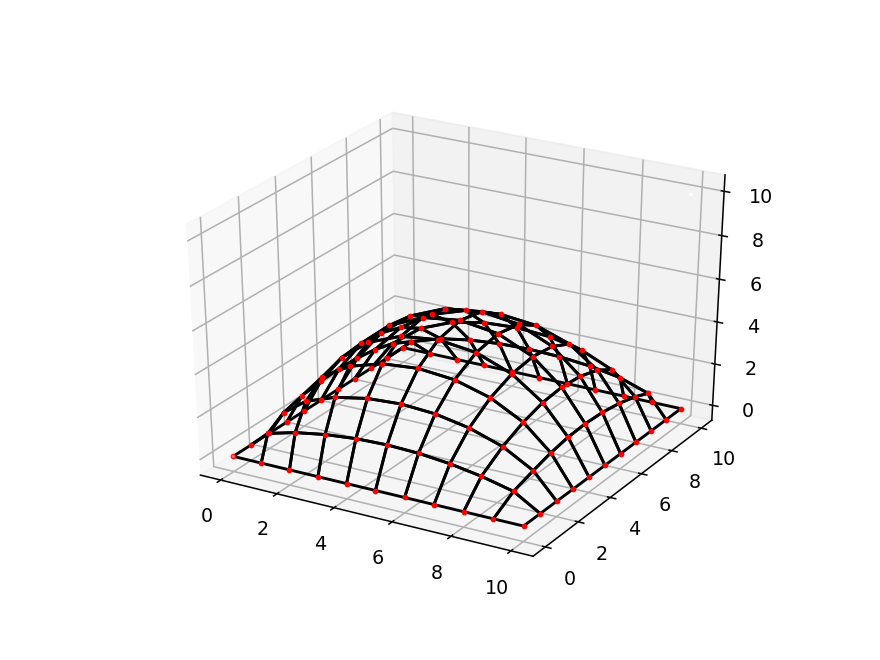

In [24]:
coordinates = xyzFS

# initiating the plotter
fig = plt.figure()
ax = fig.gca(projection='3d')

# plotting edges
for u, v in edges:
    ax.plot([coordinates[u][0], coordinates[v][0]],
            [coordinates[u][1], coordinates[v][1]],
            [coordinates[u][2], coordinates[v][2]], color='k')

# plotting points
for i in points:
    ax.scatter(coordinates[i][0], coordinates[i][1], coordinates[i][2],
               color='r', s=4)
    
# This command changes the scale of the axes
ax.scatter([bbmin[0], bbmax[0]], [bbmin[1], bbmax[1]], [bbmin[2], bbmax[2]+10], color='w', s=1)

# These are needed for the 
# ax.set_xlim([bbmin[0], bbmax[0]])
# ax.set_ylim([bbmin[1], bbmax[1]])
# ax.set_zlim([bbmin[2], bbmax[2]+10])

plt.show()

# A library that works a bit faster ...
[Plotly](https://plot.ly/python/) is another open source library for Python, that works significantly faster than Matplotlib on Jupyter notebooks. Also, it's a bit easier to use: see for yourself below.

In [31]:
import plotly.graph_objects as go
import numpy as np

# Here we extract the mesh coordinates from the final state NumPy array

# Initial state data is still in list format, so we first convert it to a NumPy array


In [32]:
# More complex example of Plotly plot: lines and dots